In [1]:
# %matplotlib inline
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 100)
from geopandas import GeoDataFrame
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mapclassify as mc
# import pysal

In [2]:
neighborhoods = gpd.read_file('../00_data/RAW/philadelphia/neighborhoods/neighborhoods.geojson')
planning_districts = gpd.read_file('../00_data/RAW/philadelphia/planning_districts/Planning_Districts.geojson')
planning_districts = planning_districts.to_crs({'init':'epsg:2272'})


In [3]:
neighborhoods = neighborhoods.to_crs({'init':'epsg:2272'})


In [4]:
parks = gpd.read_file("../00_data/RAW/philadelphia/parks/PPR_Properties.geojson")
parks= parks.to_crs({'init':'epsg:2272'})

In [5]:
northphilly = planning_districts.loc[(planning_districts['DIST_NAME']=='North') | 
                                     (planning_districts['DIST_NAME']=='Lower North')].copy()

westPhilly = neighborhoods.loc[neighborhoods['alt_name'] == 'West Philadelphia'].copy()

germantown = neighborhoods.loc[neighborhoods['alt_name']=='Germantown Area'].copy()

In [6]:
# loading other base layers for plots
water = gpd.read_file("../00_data/RAW/philadelphia/hyrdography/selected_water.geojson")
districts = gpd.read_file("../00_data/RAW/philadelphia/planning_districts/Planning_Districts.geojson")
city = gpd.read_file("../00_data/RAW/philadelphia/city_limits/City_Limits.geojson")
roads = gpd.read_file("../00_data/RAW/philadelphia/tl_2017_42101_roads/tl_2017_42101_roads.shp")
# njroads = gpd.read_file("../00_data/RAW/philadelphia/tl_2015_34_prisecroads/nj_roads_select.geojson")
# paroads = gpd.read_file("../00_data/RAW/philadelphia/tl_2014_42_prisecroads/penn_roads_select.geojson")
neighborhoods = gpd.read_file("../00_data/RAW/philadelphia/neighborhoods/neighborhoods.geojson")
water_all = gpd.read_file("../00_data/RAW/philadelphia/hyrdography/Hydrographic_Features_Poly.geojson")


# reprojecting to philadelphia crs
districts = districts.to_crs({'init':'epsg:2272'})
roads = roads.to_crs({'init':'epsg:2272'})
city = city.to_crs({'init':'epsg:2272'})
# njroads = njroads.to_crs({'init':'epsg:2272'})
# paroads = paroads.to_crs({'init':'epsg:2272'})
# selecting just major roads
roads_formap = roads.loc[roads["RTTYP"] != 'M']
# selecting just minor roads
roads_minorformap = roads.loc[roads["RTTYP"] == 'M']

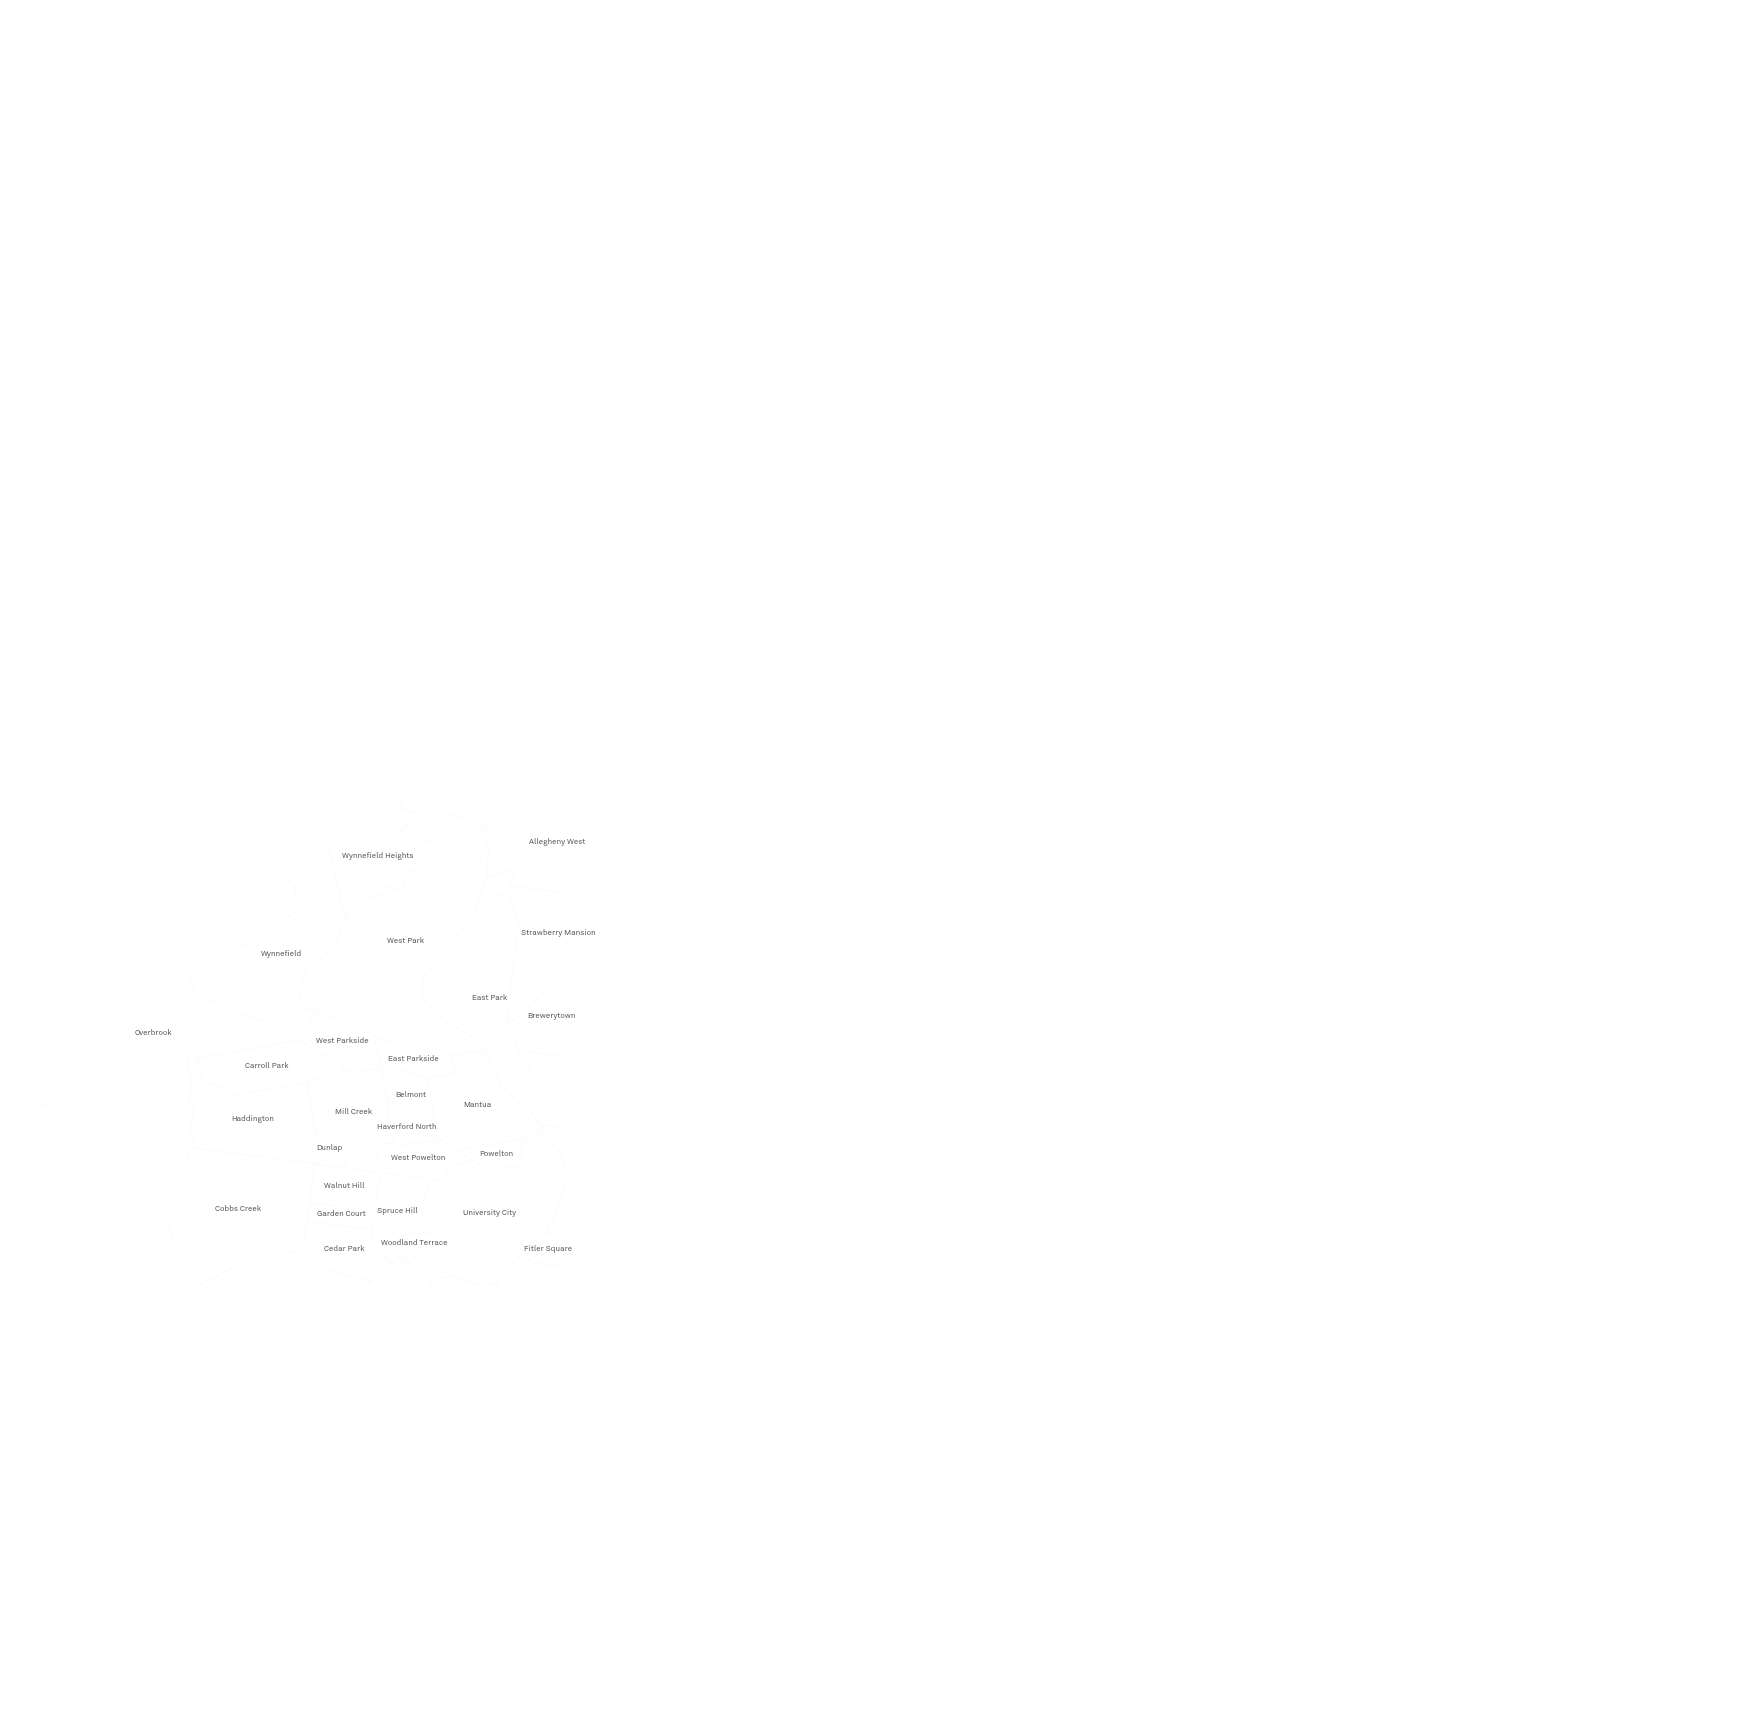

In [45]:
# west_philly neighborhood zoom 


xlim = ([westPhilly.total_bounds[0],westPhilly.total_bounds[2]])
ylim = ([westPhilly.total_bounds[1],westPhilly.total_bounds[3]])

fig, ax = plt.subplots(figsize=(10,10))
# roads_minorformap.plot(ax=ax, color="lightgrey", linewidth =0.25, alpha=0.3);
# roads_formap.plot(ax=ax, color="lightgrey", alpha=.3);
# parks.plot(ax=ax,color="#D9E3A0",edgecolor='none', alpha=0.8)

# water.plot(ax=ax, color="#B4B4B4", edgecolor='none', alpha=.3);
neighborhoods.plot(ax=ax,facecolor='none',edgecolor='#FAFAFA',linewidth=1, alpha=.5);

neighborhoods.apply(lambda x: ax.annotate(s=x.mapname, xy=x.geometry.centroid.coords[0], 
                                      ha='center',fontname="Akkurat Pro", backgroundcolor = "white",fontsize=8,color='#5A5A5A'),axis=1); 


ax.set_xlim(xlim);
ax.set_ylim(ylim);
ax.set_axis_off()

#     ax.set_title(years[i]);
plt.savefig('../05_drawings/02_outputs/complete_drafts/neighborhoods/west_philly.svg')




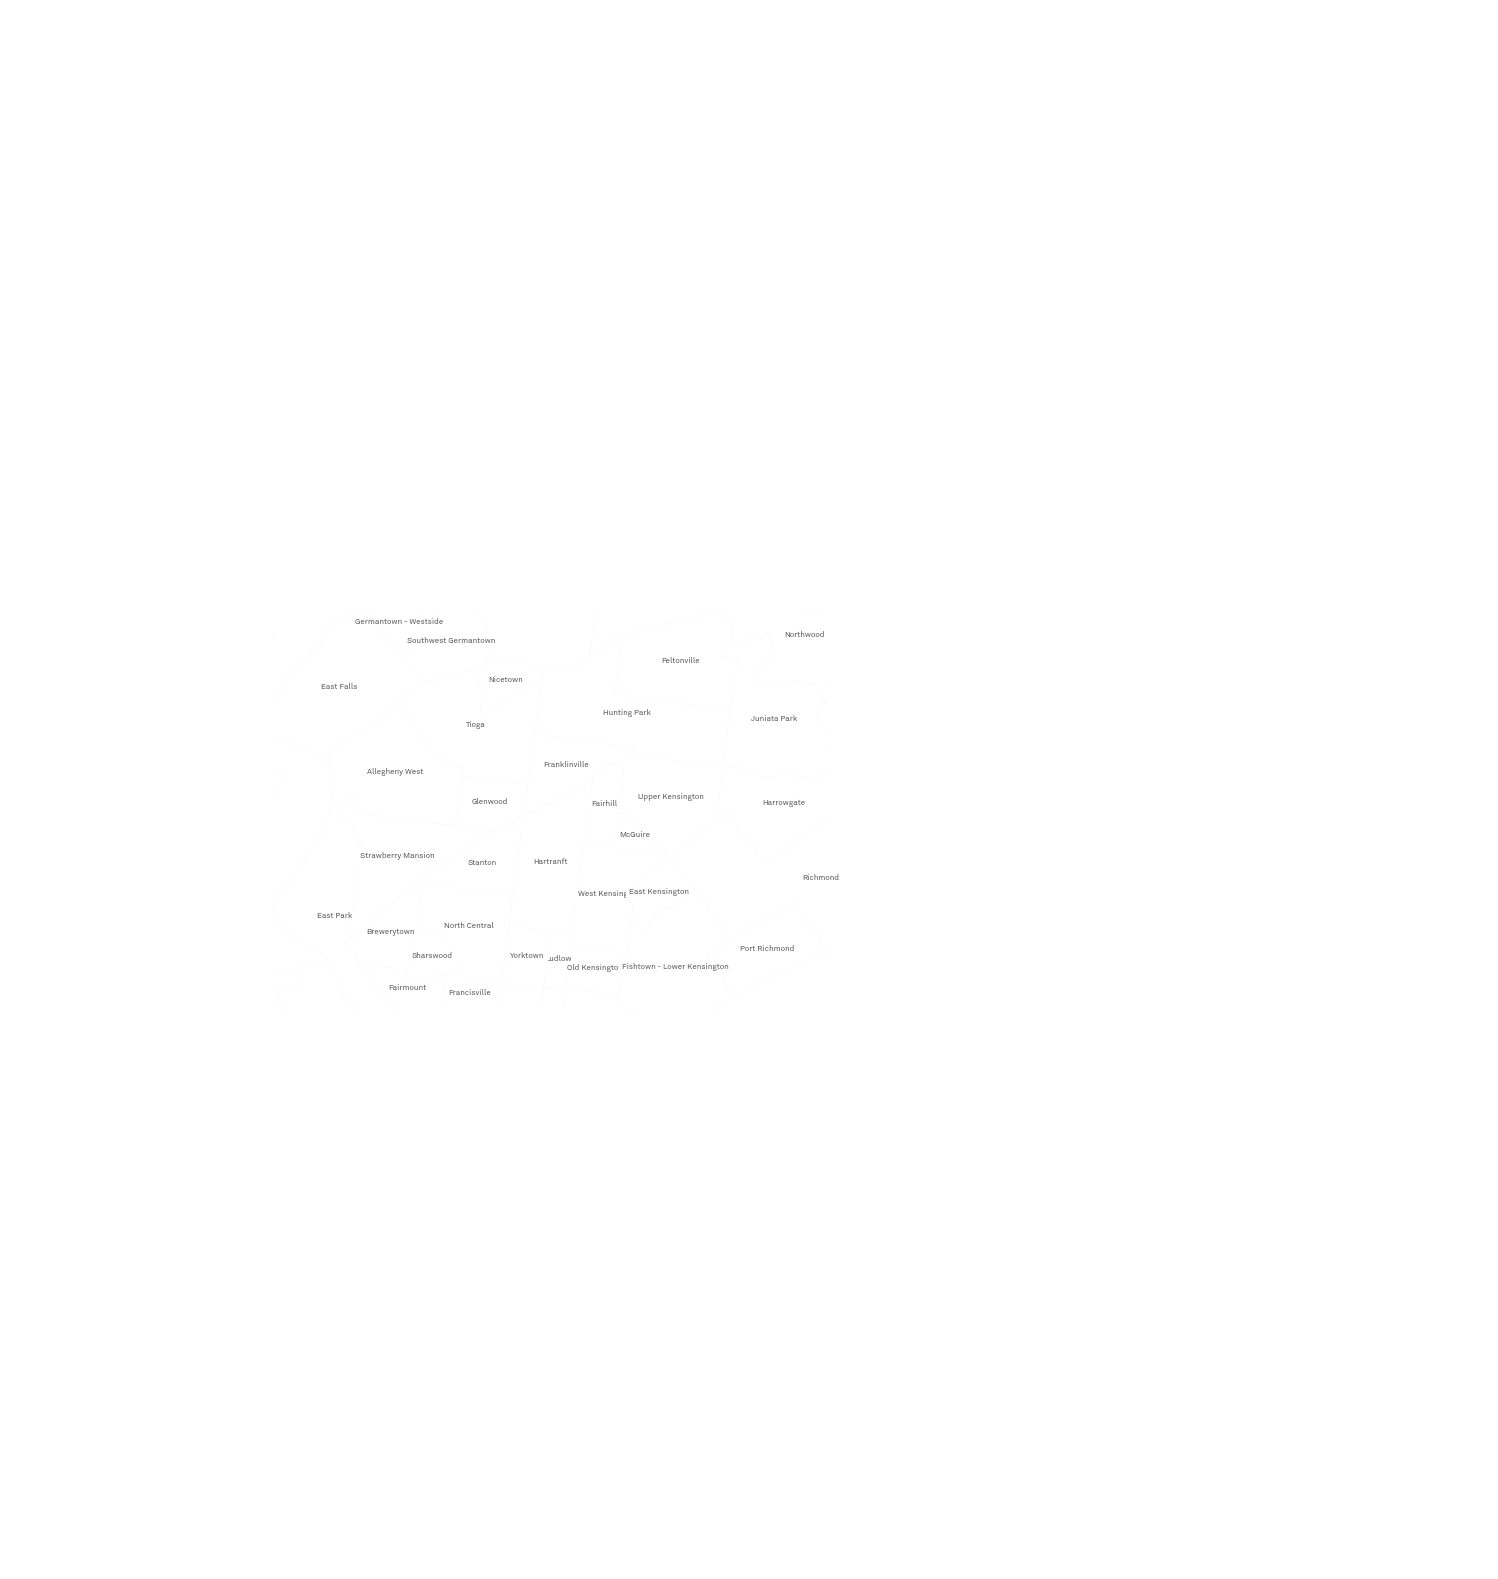

In [47]:
# west_philly neighborhood zoom 


xlim = ([northphilly.total_bounds[0],northphilly.total_bounds[2]])
ylim = ([northphilly.total_bounds[1],northphilly.total_bounds[3]])

fig, ax = plt.subplots(figsize=(10,10))
# roads_minorformap.plot(ax=ax, color="lightgrey", linewidth =0.25, alpha=0.3);
# roads_formap.plot(ax=ax, color="lightgrey", alpha=.3);
# parks.plot(ax=ax,color="#D9E3A0",edgecolor='none', alpha=0.8)

# water.plot(ax=ax, color="#B4B4B4", edgecolor='none', alpha=.3);
neighborhoods.plot(ax=ax,facecolor='none',edgecolor='#FAFAFA',linewidth=0.5);

neighborhoods.apply(lambda x: ax.annotate(s=x.mapname, xy=x.geometry.centroid.coords[0], 
                                      ha='center',fontname="Akkurat Pro", backgroundcolor = "white",fontsize=8,color='#5A5A5A'),axis=1); 

ax.set_xlim(xlim);
ax.set_ylim(ylim);
ax.set_axis_off()

#     ax.set_title(years[i]);
plt.savefig('../05_drawings/02_outputs/complete_drafts/neighborhoods/north_philly.svg')




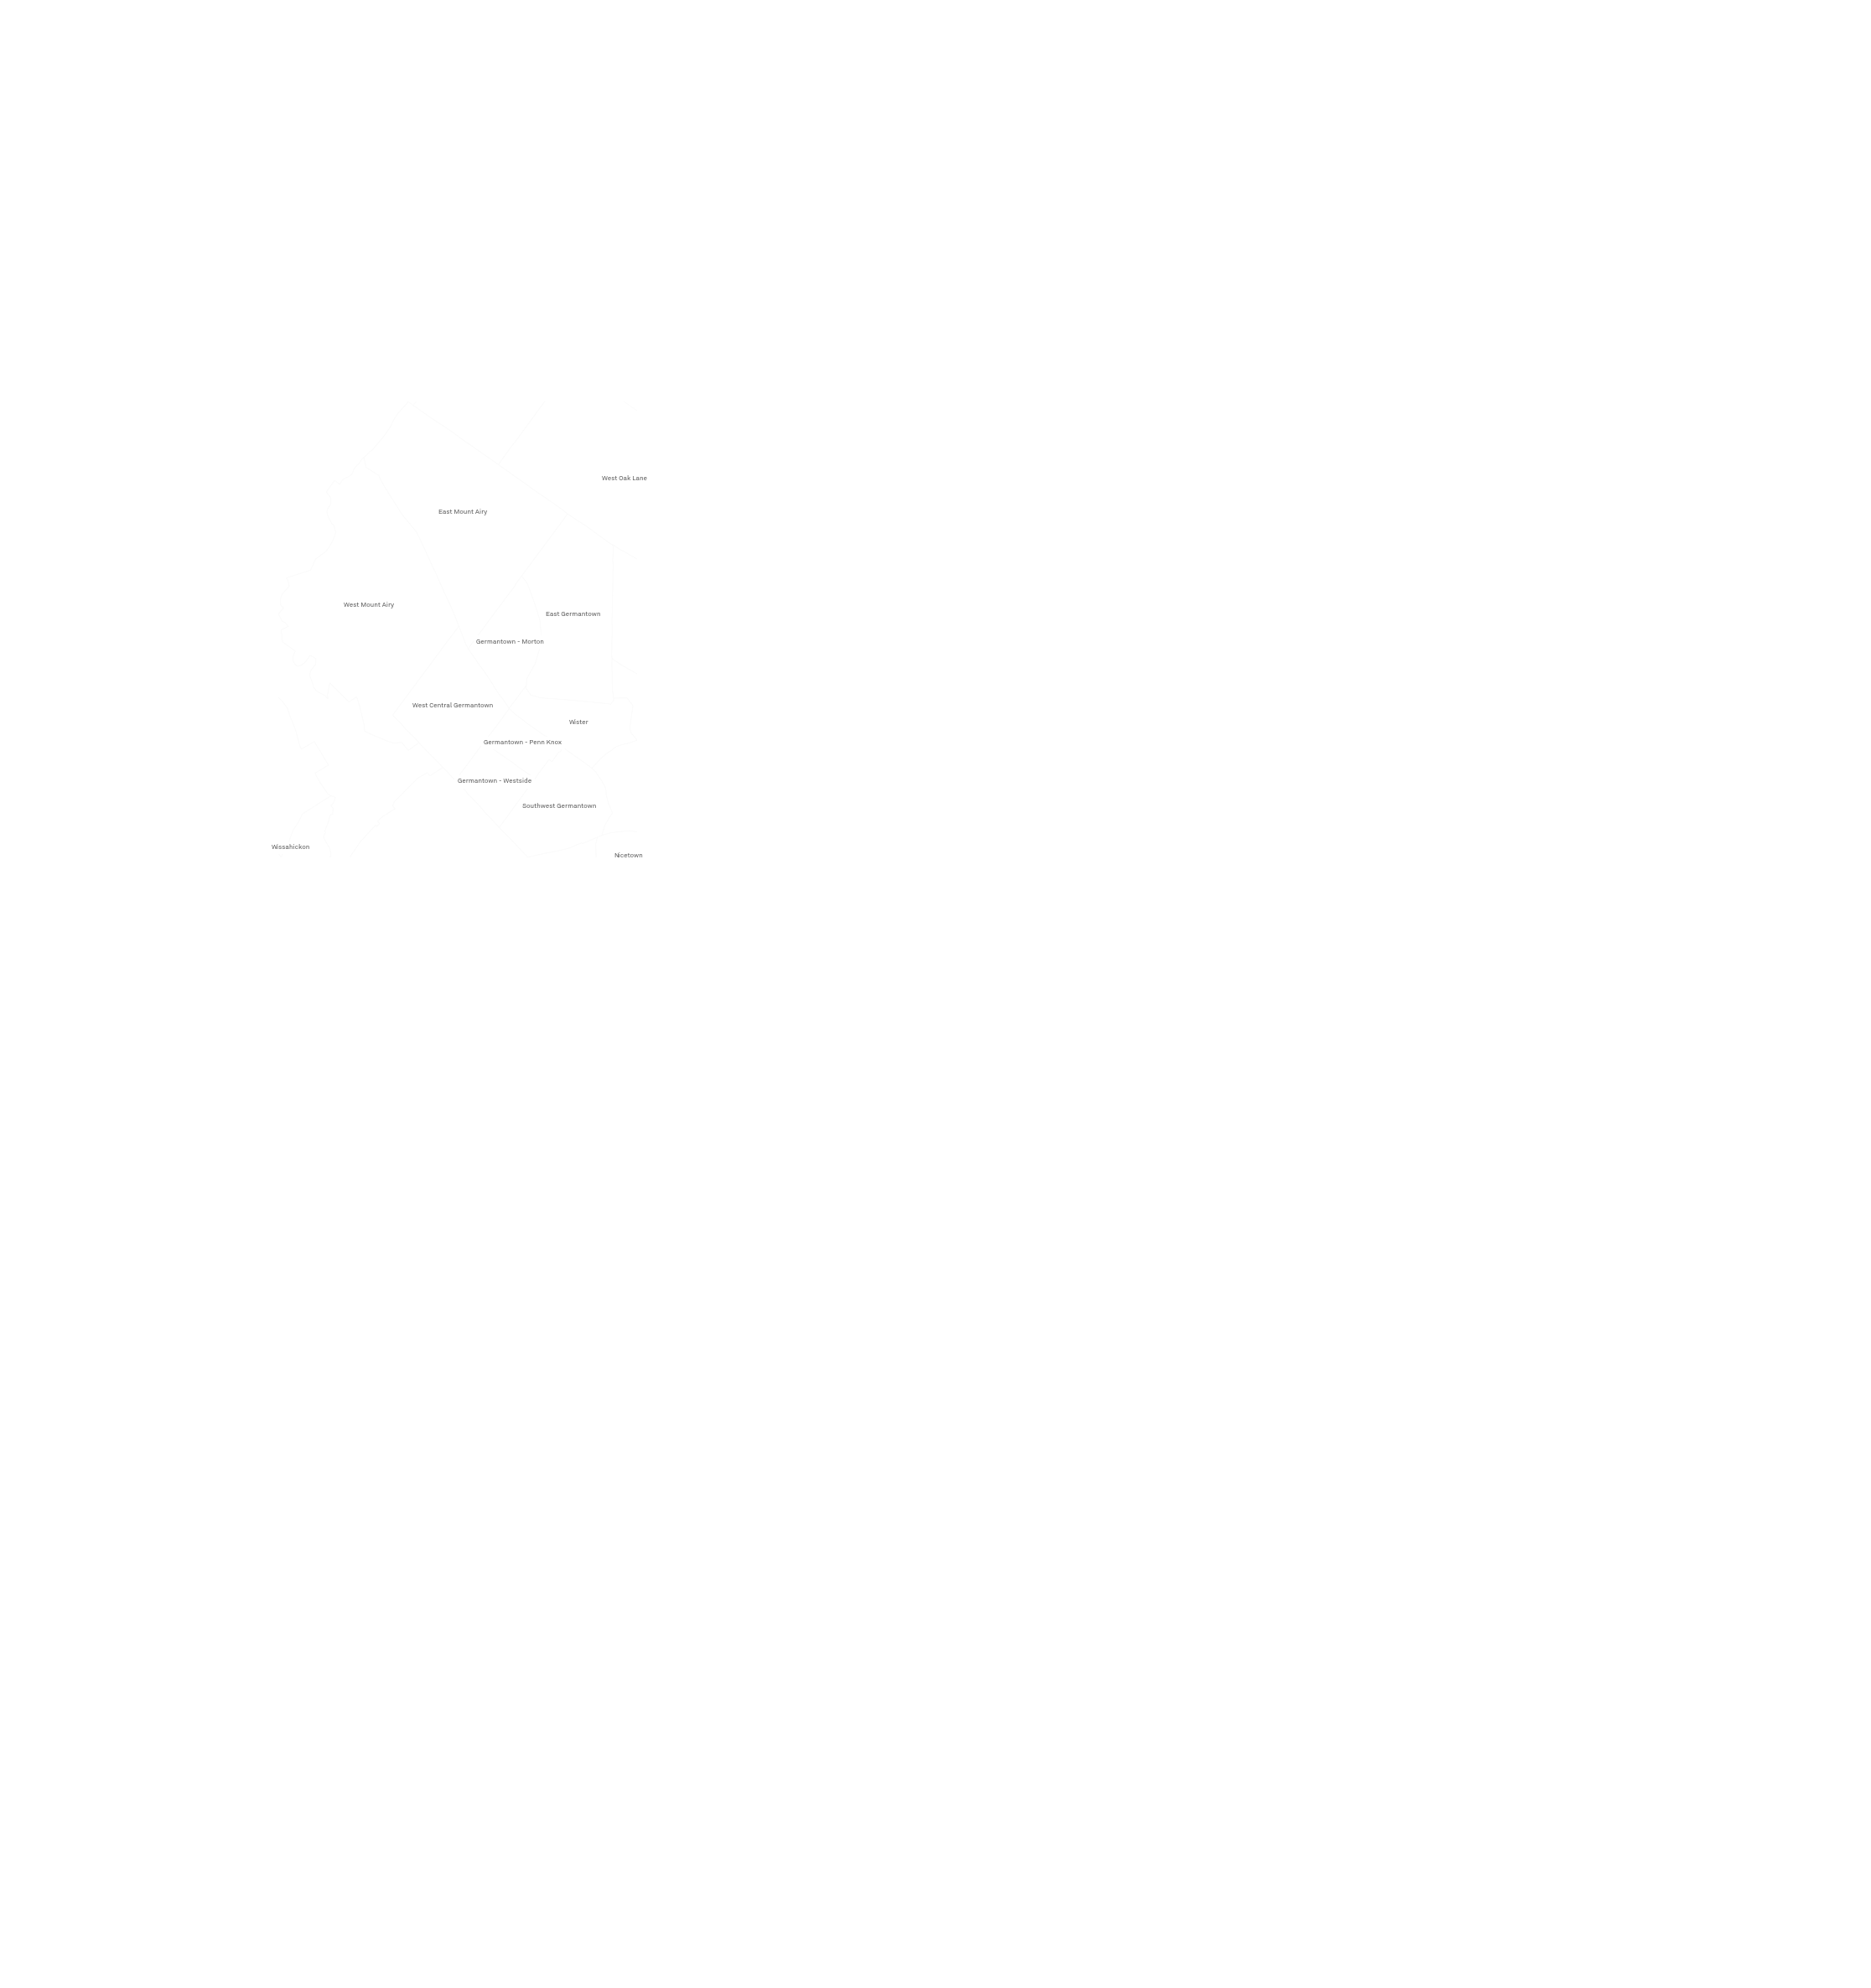

In [46]:
# west_philly neighborhood zoom 


xlim = ([germantown.total_bounds[0],germantown.total_bounds[2]])
ylim = ([germantown.total_bounds[1],germantown.total_bounds[3]])

fig, ax = plt.subplots(figsize=(10,10))
# roads_minorformap.plot(ax=ax, color="lightgrey", linewidth =0.25, alpha=0.3);
# roads_formap.plot(ax=ax, color="lightgrey", alpha=.3);
# parks.plot(ax=ax,color="#D9E3A0",edgecolor='none', alpha=0.8)

# water.plot(ax=ax, color="#B4B4B4", edgecolor='none', alpha=.3);
neighborhoods.plot(ax=ax,facecolor='none',edgecolor='#FAFAFA',linewidth=0.5);

neighborhoods.apply(lambda x: ax.annotate(s=x.mapname, xy=x.geometry.centroid.coords[0], 
                                      ha='center',fontname="Akkurat Pro", backgroundcolor = "white",fontsize=8,color='#5A5A5A'),axis=1); 

ax.set_xlim(xlim);
ax.set_ylim(ylim);
ax.set_axis_off()

#     ax.set_title(years[i]);
plt.savefig('../05_drawings/02_outputs/complete_drafts/neighborhoods/germantown.svg')




## get count of overlap blocks per year

In [8]:
# loading morans hh counts
morans_hh_0010 = gpd.read_file("../00_data/PROCESSED/morans_hh_blocks_0010.geojson")
morans_hh_1018 = gpd.read_file("../00_data/PROCESSED/morans_hh_1018.geojson")

In [20]:
sum_overlap = morans_hh_0010[['overlap00',
       'overlap01', 'overlap02', 'overlap03', 'overlap04', 'overlap05',
       'overlap06', 'overlap07', 'overlap08', 'overlap09']].sum()

sum_hh = morans_hh_0010[['inv_hh00', 'inv_hh01', 
       'inv_hh02', 'inv_hh03',  'inv_hh04',
       'inv_hh05',  'inv_hh06', 'inv_hh07',
       'inv_hh08', 'inv_hh09',]].sum()

In [18]:
morans_hh_0010.columns

Index(['CBLK00_', 'investor_all2000', 'investor_all2001', 'investor_all2002',
       'investor_all2003', 'investor_all2004', 'investor_all2005',
       'investor_all2006', 'investor_all2007', 'investor_all2008',
       'investor_all2009', 'owner_occup2000', 'owner_occup2001',
       'owner_occup2002', 'owner_occup2003', 'owner_occup2004',
       'owner_occup2005', 'owner_occup2006', 'owner_occup2007',
       'owner_occup2008', 'owner_occup2009', 'count_field2000',
       'count_field2001', 'count_field2002', 'count_field2003',
       'count_field2004', 'count_field2005', 'count_field2006',
       'count_field2007', 'count_field2008', 'count_field2009',
       'res_parcel_num', 'per_inv_2000', 'per_inv_2001', 'per_inv_2002',
       'per_inv_2003', 'per_inv_2004', 'per_inv_2005', 'per_inv_2006',
       'per_inv_2007', 'per_inv_2008', 'per_inv_2009', 'per_occ_2000',
       'per_occ_2001', 'per_occ_2002', 'per_occ_2003', 'per_occ_2004',
       'per_occ_2005', 'per_occ_2006', 'per_occ_2007'

In [28]:
sum_hh = morans_hh_0010[['inv_hh00', 'inv_hh01', 
       'inv_hh02', 'inv_hh03',  'inv_hh04',
       'inv_hh05',  'inv_hh06', 'inv_hh07',
       'inv_hh08', 'inv_hh09',]].sum()

In [35]:
sum_hh

inv_hh00     936
inv_hh01    1030
inv_hh02    1321
inv_hh03    1617
inv_hh04    1610
inv_hh05    1580
inv_hh06    1877
inv_hh07    1391
inv_hh08    1169
inv_hh09     841
dtype: int64

In [36]:
sum_overlap.divide(sum_hh)

inv_hh00    NaN
inv_hh01    NaN
inv_hh02    NaN
inv_hh03    NaN
inv_hh04    NaN
inv_hh05    NaN
inv_hh06    NaN
inv_hh07    NaN
inv_hh08    NaN
inv_hh09    NaN
overlap00   NaN
overlap01   NaN
overlap02   NaN
overlap03   NaN
overlap04   NaN
overlap05   NaN
overlap06   NaN
overlap07   NaN
overlap08   NaN
overlap09   NaN
dtype: float64

In [32]:
sum_overlap/2

overlap00    110.0
overlap01     92.0
overlap02     94.0
overlap03     85.0
overlap04     67.5
overlap05     71.0
overlap06     28.5
overlap07     82.5
overlap08     66.0
overlap09     29.0
dtype: float64

In [24]:
220/17311

0.012708682340708221